In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import pi
from math import exp
from scipy.signal import savgol_filter
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [6]:
data = pd.read_csv('data/data_14.csv')
data.head()

,MD,TVD,WOB,Torque,ROP,RPM,Diameter,Standpipe Pressure,Hookload,Gamma,MSE,complication
0,987.948,987.45995,6.17948,13.479999,12.79,179.850006,444.5,16538.999936,140.914586,19.015,460.888365,1
1,988.101,987.61235,6.17948,13.479999,12.79,179.850006,444.5,16538.999936,140.914586,19.015,460.888365,1
2,988.405,987.91715,6.17948,13.479999,12.79,179.850006,444.5,16538.999936,140.914586,19.015,460.888365,1
3,988.558,988.06955,6.17948,13.479999,12.79,179.850006,444.5,16538.999936,140.914586,19.015,460.888365,1
4,988.863,988.37435,6.17948,13.479999,12.79,179.850006,444.5,16538.999936,140.914586,19.015,460.888365,1


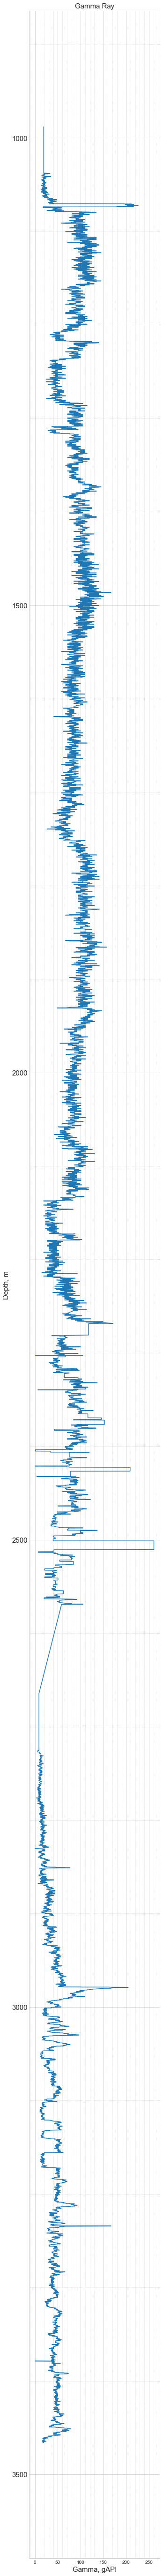

In [14]:
plt.style.use('seaborn-whitegrid')
fig, (ax0) = plt.subplots(1,1,figsize=(5,100))
ax0.plot(data.Gamma,data.MD)
ax0.set_title('Gamma Ray', fontsize=15)
ax0.set_ylabel('Depth, m', fontsize=15)
ax0.set_xlabel('Gamma, gAPI', fontsize=15)
ax0.tick_params('y',labelsize=15)
ax0.minorticks_on()
ax0.grid(True)
ax0.grid(which='minor', linestyle = ':')
ax0.invert_yaxis()

In [15]:
data1 = pd.read_csv('USROP-master/USROP_A 0 N-NA_F-9_Ad.csv')
data1.head()

,Unnamed: 0,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
0,0,491.033,5.842270,9440.922214,0.244047,42.864024,84.0,2784.321942,1.21,311.15,93.780222,490.760309,150.88
1,1,491.185,6.241431,9499.941336,0.244047,42.315384,84.0,2784.321942,1.21,311.15,93.979803,490.910880,150.88
2,2,491.222,6.241431,9499.941336,0.244047,42.315384,84.0,2784.321942,1.21,311.15,93.979803,490.910880,150.88
3,3,491.338,6.368437,9313.024466,0.216931,42.894504,84.0,2784.321942,1.21,311.15,94.079593,491.061756,146.26
4,4,491.341,6.368437,9313.024466,0.216931,42.894504,84.0,2784.321942,1.21,311.15,94.079593,491.061756,146.26


In [5]:
data = pd.read_csv('D:/Патент/data/data_14.csv')

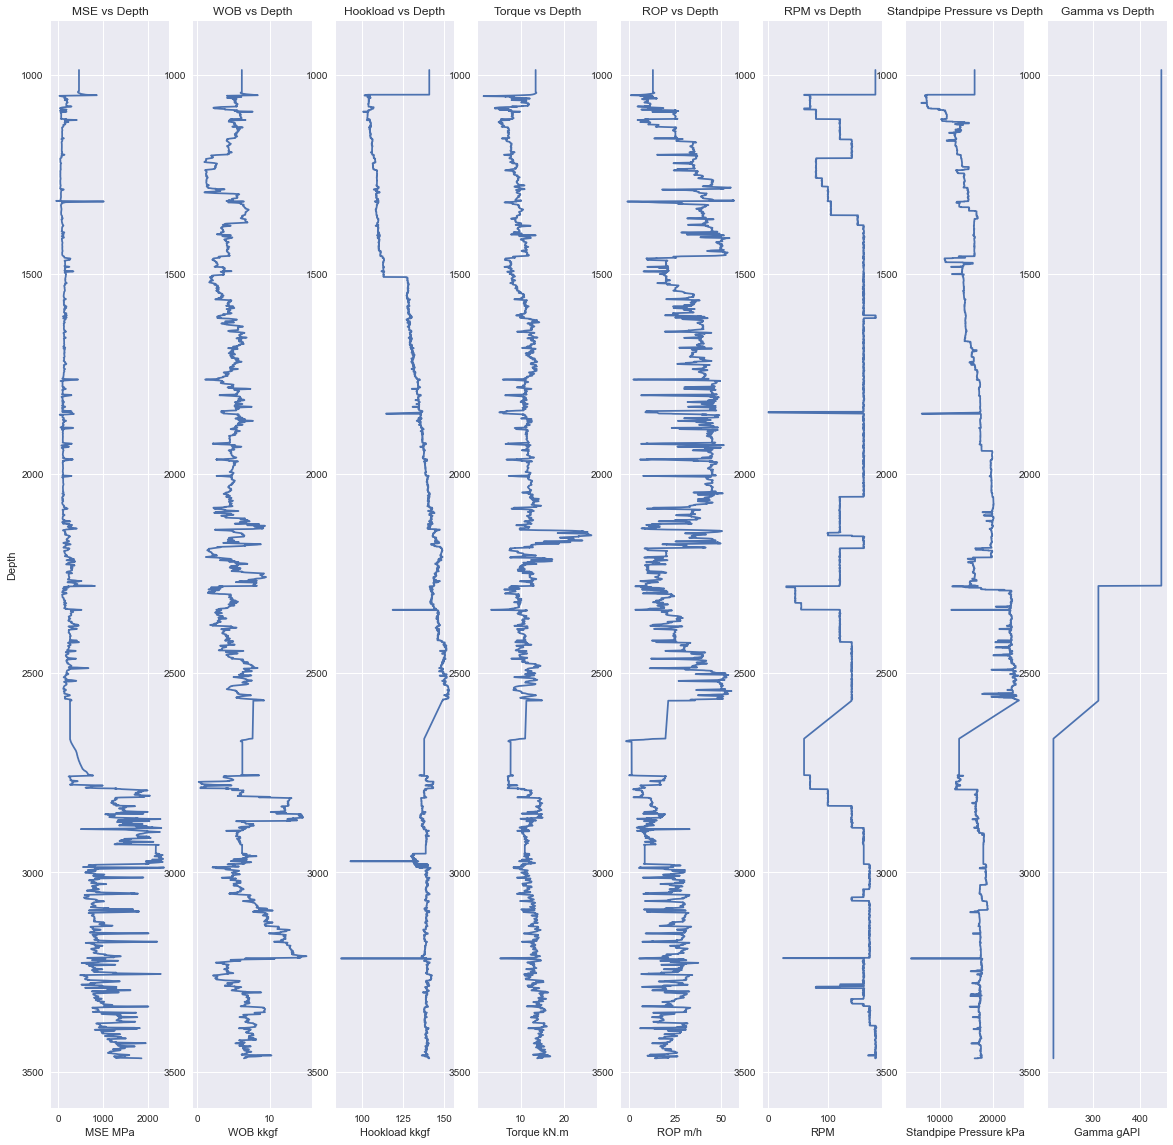

In [8]:
plot_parameters(data)

In [2]:
%matplotlib inline

In [3]:
F_9A = pd.read_csv('USROP-master/USROP_A 0 N-NA_F-9_Ad.csv')
F_9 = pd.read_csv('USROP-master/USROP_A 6 N-SH_F-9d.csv')
F_5 = pd.read_csv('USROP-master/USROP_A 5 N-SH-F-5d.csv')
F_7 = pd.read_csv('USROP-master/USROP_A 1 N-S_F-7d.csv')
F_14 = pd.read_csv('USROP-master/USROP_A 2 N-SH_F-14d.csv')
F_15 = pd.read_csv('USROP-master/USROP_A 3 N-SH-F-15d.csv')
F_15S = pd.read_csv('USROP-master/USROP_A 4 N-SH_F-15Sd.csv')

In [4]:
F_9A[F_9A['Measured Depth m']>1000].head(10)

,Unnamed: 0,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
9412,9412,1000.049,8.699902,8030.392767,7.592581,49.542192,141.5,1586.920419,1.198264,215.9,88.445976,905.705275,25.37
9413,9413,1000.052,8.699902,8030.392767,7.592581,49.542192,141.5,1586.920419,1.198264,215.9,88.445976,905.705275,25.37
9414,9414,1000.125,8.699902,8030.392767,7.592581,49.542192,141.5,1586.920419,1.198264,215.9,88.445976,905.705275,25.37
9415,9415,1000.201,8.876803,8034.805412,8.026442,50.904648,141.0,1586.920419,1.198264,215.9,88.876889,905.790619,25.37
9416,9416,1000.262,8.876803,8034.805412,8.026442,50.904648,141.0,1586.920419,1.198264,215.9,88.876889,905.790619,25.37
9417,9417,1000.335,8.876803,8034.805412,8.026442,50.904648,141.0,1586.920419,1.198264,215.9,88.876889,905.790619,25.37
9418,9418,1000.338,8.876803,8034.805412,8.026442,50.904648,141.0,1586.920419,1.198264,215.9,88.876889,905.790619,25.37
9419,9419,1000.354,4.617570,7957.722025,8.162024,24.688800,141.3,1586.920419,1.198264,215.9,90.432711,905.875658,25.37
9420,9420,1000.381,4.617570,7957.722025,8.162024,24.688800,141.3,1586.920419,1.198264,215.9,90.432711,905.875658,25.37
9421,9421,1000.476,4.617570,7957.722025,8.162024,24.688800,141.3,1586.920419,1.198264,215.9,90.432711,905.875658,25.37


In [5]:
#inputing needed parameters
F_9A_MSE = F_9A.loc[:,['Measured Depth m', 'Hole Depth (TVD) m', 'Weight on Bit kkgf', 
                       'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 
                       'Diameter mm', 'Average Standpipe Pressure kPa', 'Average Hookload kkgf', 'USROP Gamma gAPI']]
F_9_MSE = F_9.loc[:,['Measured Depth m', 'Hole Depth (TVD) m', 'Weight on Bit kkgf', 
                     'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 
                     'Diameter mm', 'Average Standpipe Pressure kPa', 'Average Hookload kkgf', 'USROP Gamma gAPI']]
F_5_MSE = F_5.loc[:,['Measured Depth m', 'Hole Depth (TVD) m', 'Weight on Bit kkgf', 
                     'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 
                     'Diameter mm', 'Average Standpipe Pressure kPa', 'Average Hookload kkgf', 'USROP Gamma gAPI']]
F_7_MSE = F_7.loc[:,['Measured Depth m', 'Hole Depth (TVD) m', 'Weight on Bit kkgf', 
                     'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 
                     'Diameter mm', 'Average Standpipe Pressure kPa', 'Average Hookload kkgf', 'USROP Gamma gAPI']]
F_14_MSE = F_14.loc[:,['Measured Depth m', 'Hole Depth (TVD) m', 'Weight on Bit kkgf', 
                       'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 
                       'Diameter mm', 'Average Standpipe Pressure kPa', 'Average Hookload kkgf', 'USROP Gamma gAPI']]
F_15_MSE = F_15.loc[:,['Measured Depth m', 'Hole Depth (TVD) m', 'Weight on Bit kkgf', 
                       'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 
                       'Diameter mm', 'Average Standpipe Pressure kPa', 'Average Hookload kkgf', 'USROP Gamma gAPI']]
F_15S_MSE = F_15S.loc[:,['Measured Depth m', 'Hole Depth (TVD) m', 'Weight on Bit kkgf', 
                         'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 
                         'Diameter mm', 'Average Standpipe Pressure kPa', 'Average Hookload kkgf', 'USROP Gamma gAPI']]
#renaming columns 
F_9A_MSE.columns = ['MD', 'TVD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter', 'Standpipe Pressure', 'Hookload', 'Gamma']
F_9_MSE.columns = ['MD', 'TVD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter', 'Standpipe Pressure', 'Hookload', 'Gamma']
F_5_MSE.columns = ['MD', 'TVD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter', 'Standpipe Pressure', 'Hookload', 'Gamma']
F_7_MSE.columns = ['MD', 'TVD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter', 'Standpipe Pressure', 'Hookload', 'Gamma']
F_14_MSE.columns = ['MD', 'TVD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter', 'Standpipe Pressure', 'Hookload', 'Gamma']
F_15_MSE.columns = ['MD', 'TVD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter', 'Standpipe Pressure', 'Hookload', 'Gamma']
F_15S_MSE.columns = ['MD', 'TVD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter', 'Standpipe Pressure', 'Hookload', 'Gamma']

In [6]:
#MSE computation 
F_9A_MSE['MSE'] = (F_9A_MSE['WOB']*1000*9.81/(pi/4*(F_9A_MSE['Diameter']/1000)**2)+2*pi*F_9A_MSE['RPM']/60*F_9A_MSE['Torque']*1000/(pi/4*(F_9A_MSE['Diameter']/1000)**2)/(F_9A_MSE['ROP']/3600))*10**(-6)
F_9_MSE['MSE'] = (F_9_MSE['WOB']*1000*9.81/(pi/4*(F_9_MSE['Diameter']/1000)**2)+2*pi*F_9_MSE['RPM']/60*F_9_MSE['Torque']*1000/(pi/4*(F_9_MSE['Diameter']/1000)**2)/(F_9_MSE['ROP']/3600))*10**(-6)
F_7_MSE['MSE'] = (F_7_MSE['WOB']*1000*9.81/(pi/4*(F_7_MSE['Diameter']/1000)**2)+2*pi*F_7_MSE['RPM']/60*F_7_MSE['Torque']*1000/(pi/4*(F_7_MSE['Diameter']/1000)**2)/(F_7_MSE['ROP']/3600))*10**(-6)
F_5_MSE['MSE'] = (F_5_MSE['WOB']*1000*9.81/(pi/4*(F_5_MSE['Diameter']/1000)**2)+2*pi*F_5_MSE['RPM']/60*F_5_MSE['Torque']*1000/(pi/4*(F_5_MSE['Diameter']/1000)**2)/(F_5_MSE['ROP']/3600))*10**(-6)
F_14_MSE['MSE'] = (F_14_MSE['WOB']*1000*9.81/(pi/4*(F_14_MSE['Diameter']/1000)**2)+2*pi*F_14_MSE['RPM']/60*F_14_MSE['Torque']*1000/(pi/4*(F_14_MSE['Diameter']/1000)**2)/(F_14_MSE['ROP']/3600))*10**(-6)
F_15_MSE['MSE'] = (F_15_MSE['WOB']*1000*9.81/(pi/4*(F_15_MSE['Diameter']/1000)**2)+2*pi*F_15_MSE['RPM']/60*F_15_MSE['Torque']*1000/(pi/4*(F_15_MSE['Diameter']/1000)**2)/(F_15_MSE['ROP']/3600))*10**(-6)
F_15S_MSE['MSE'] = (F_15S_MSE['WOB']*1000*9.81/(pi/4*(F_15S_MSE['Diameter']/1000)**2)+2*pi*F_15S_MSE['RPM']/60*F_15S_MSE['Torque']*1000/(pi/4*(F_15S_MSE['Diameter']/1000)**2)/(F_15S_MSE['ROP']/3600))*10**(-6)

In [7]:
def isolation_forest(data):
    contamination = 0.008*len(data.MD)/10000
    clf=IsolationForest(n_estimators=200, max_samples='auto', contamination=contamination, \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
    clf.fit(data['MSE'].values.reshape(-1,1))
    pred = clf.predict(data['MSE'].values.reshape(-1,1))
    data['anomaly']=pred
    outliers=data.loc[data['anomaly']==-1]
    outlier_index=list(outliers.index)
    return data

In [8]:
def plot_anomaly(data):
    plt.style.use('seaborn')
    fig,ax = plt.subplots(1,1,figsize=(10,15))
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=15) 
    anomaly = data['anomaly'].values
    MSE = data['MSE'].values
    depth = data['MD'].values
    plt.xlabel('MSE МПа', fontsize=20)
    plt.ylabel('Глубина м', fontsize=15)
    plt.tick_params(axis='both',labelsize=15)
    for i in range(len(anomaly)):
        if anomaly[i] == -1:
            plt.plot(MSE[i],depth[i],marker='o',color='red')
    plt.plot(MSE, depth)
    plt.grid(True)
    plt.legend()
    ax.invert_yaxis()

In [9]:
def delete_anomaly(data):
    data.loc[data['anomaly']==-1, ['MSE']] = np.nan
    data.interpolate(method='linear', inplace=True, limit_area=None)
    data = data.fillna(method='bfill')
    data = data.fillna(method='ffill')
    return data

In [10]:
def data_smoothing(data): 
    data['MSE'] = savgol_filter(data['MSE'].values,81,3)
    data['WOB'] = savgol_filter(data['WOB'].values,61,3)
    data['ROP'] = savgol_filter(data['ROP'].values,61,3)
    data['Torque'] = savgol_filter(data['Torque'].values,61,3)
    return data

In [11]:
def plot_complication(data):
    plt.style.use('seaborn')
    fig,ax = plt.subplots(1,1,figsize=(7,15))
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
    complication = np.array(data['complication'].values)
    MSE = np.array(data['MSE'].values)
    depth = np.array(data['MD'].values)
    plt.xlabel('MSE МПа', fontsize=20)
    plt.ylabel('Глубина м', fontsize=20)
    plt.tick_params(axis='both',labelsize=20)
    for i in range(len(complication)):
        if complication[i] == 1:
            plt.plot(MSE[i],depth[i],marker='o',color='red')
    plt.plot(MSE, depth)
    plt.grid(True)
    plt.legend()
    ax.invert_yaxis()

In [7]:
def plot_parameters(data):
    plt.style.use('seaborn')
    fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,8,figsize = (20,20))
    ax1.set_ylabel('Depth');
    ax1.plot(data.MSE,data.MD)
    ax1.set_xlabel('MSE MPa');
    ax1.set_title('MSE vs Depth');
    ax2.plot(data.WOB,data.MD)
    ax2.set_xlabel('WOB kkgf');
    ax2.set_title('WOB vs Depth');
    ax3.plot(data.Hookload,data.MD)
    ax3.set_xlabel('Hookload kkgf');
    ax3.set_title('Hookload vs Depth');
    ax4.plot(data.Torque,data.MD)
    ax4.set_xlabel('Torque kN.m');
    ax4.set_title('Torque vs Depth');
    ax5.plot(data.ROP,data.MD)
    ax5.set_xlabel('ROP m/h');
    ax5.set_title('ROP vs Depth');
    ax6.plot(data.RPM,data.MD)
    ax6.set_xlabel('RPM');
    ax6.set_title('RPM vs Depth');
    ax7.plot(data['Standpipe Pressure'],data.MD)
    ax7.set_xlabel('Standpipe Pressure kPa');
    ax7.set_title('Standpipe Pressure vs Depth');
    ax8.plot(data.Diameter,data.MD)
    ax8.set_xlabel('Gamma gAPI');
    ax8.set_title('Gamma vs Depth');    
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    ax3.invert_yaxis()
    ax4.invert_yaxis()
    ax5.invert_yaxis()
    ax6.invert_yaxis()
    ax7.invert_yaxis()
    ax8.invert_yaxis()

In [13]:
def plot_mse(data):
    plt.style.use('seaborn')
    fig, ax = plt.subplots(1,1,figsize = (7,60))
    ax.plot(data.MSE, data.MD)
    ax.set_xlabel('MSE МПа')
    ax.set_ylabel('Глубина м')
    ax.set_title('MSE vs Depth')
    ax.invert_yaxis()

In [14]:
def drop_anomaly_column(data):
    data = data.drop(columns=['anomaly'])
    return data

In [15]:
F_9A_MSE = isolation_forest(F_9A_MSE)
F_9_MSE = isolation_forest(F_9_MSE)
F_5_MSE = isolation_forest(F_5_MSE)
F_7_MSE = isolation_forest(F_7_MSE)
F_14_MSE = isolation_forest(F_14_MSE)
F_15_MSE = isolation_forest(F_15_MSE)
F_15S_MSE = isolation_forest(F_15S_MSE)

In [16]:
F_9A_MSE = delete_anomaly(F_9A_MSE)
F_9_MSE = delete_anomaly(F_9_MSE)
F_5_MSE = delete_anomaly(F_5_MSE)
F_7_MSE = delete_anomaly(F_7_MSE)
F_14_MSE = delete_anomaly(F_14_MSE)
F_15_MSE = delete_anomaly(F_15_MSE)
F_15S_MSE = delete_anomaly(F_15S_MSE)

In [17]:
F_9A_MSE = data_smoothing(F_9A_MSE)
F_9_MSE = data_smoothing(F_9_MSE)
F_5_MSE = data_smoothing(F_5_MSE)
F_7_MSE = data_smoothing(F_7_MSE)
F_14_MSE = data_smoothing(F_14_MSE)
F_15_MSE = data_smoothing(F_15_MSE)
F_15S_MSE = data_smoothing(F_15S_MSE)

In [18]:
F_9A_MSE = drop_anomaly_column(F_9A_MSE)
F_9_MSE = drop_anomaly_column(F_9_MSE)
F_5_MSE = drop_anomaly_column(F_5_MSE)
F_7_MSE = drop_anomaly_column(F_7_MSE)
F_14_MSE = drop_anomaly_column(F_14_MSE)
F_15_MSE = drop_anomaly_column(F_15_MSE)
F_15S_MSE = drop_anomaly_column(F_15S_MSE)

In [19]:
#INTERPRETATION FOR LEARNING
# F_9A
complication_9A = []
for i in range(len(F_9A_MSE.MD)):
    complication_9A.append(0)
F_9A_MSE['complication'] = complication_9A
F_9A_MSE.loc[F_9A_MSE.MSE > 550,['complication']] = 1

In [20]:
#interpretation F_9 (F_9 and F_7 - no complications found)
F_9_MSE['complication'] = 0
F_7_MSE['complication'] = 0

In [21]:
#interpretation F_5
complication_5 = []
for i in range(len(F_5_MSE.MD)):
    complication_5.append(0)
F_5_MSE['complication'] = complication_5
F_5_MSE.loc[F_5_MSE.MSE > 4500,['complication']] = 1

In [22]:
#interpretation F_14
complication_14 = []
for i in range(len(F_14_MSE.MD)):
    complication_14.append(0)
F_14_MSE['complication'] = complication_14

for i in range(len(F_14_MSE.MD)):
    if F_14_MSE.MD[i] < 2000:
        if F_14_MSE.MSE[i] > 400:
            F_14_MSE.loc[i,['complication']] = 1
    else: 
        if F_14_MSE.MD[i] < 2500:
            if F_14_MSE.MSE[i] > 380:
                F_14_MSE.loc[i,['complication']] = 1
        else:
            if F_14_MSE.MD[i] < 2990:
                if F_14_MSE.MSE[i] > 1000:
                    F_14_MSE.loc[i,['complication']] = 1

In [23]:
#interpretation F_15
complication_15 = []
for i in range(len(F_15_MSE.MD)):
    complication_15.append(0)
F_15_MSE['complication'] = complication_15

for i in range(len(F_15_MSE.MD)):
    if F_15_MSE.MD[i] < 2000:
        if F_15_MSE.MSE[i] > 500:
            F_15_MSE.loc[i,['complication']] = 1
    else: 
        if F_15_MSE.MD[i] < 2760:
            if F_15_MSE.MSE[i] > 1500:
                F_15_MSE.loc[i,['complication']] = 1
        else:
            if F_15_MSE.MD[i] < 3000:
                if F_15_MSE.MSE[i] > 1800:
                    F_15_MSE.loc[i,['complication']] = 1
            else: 
                if F_15_MSE.MD[i] < 3250:
                    if F_15_MSE.MSE[i] > 2000:
                        F_15_MSE.loc[i,['complication']] = 1

In [24]:
#interpretation F_15S
complication_15S = []
for i in range(len(F_15S_MSE.MD)):
    complication_15S.append(0)
F_15S_MSE['complication'] = complication_15S

for i in range(len(F_15S_MSE.MD)):
    if F_15S_MSE.MD[i] < 2000:
        if F_15S_MSE.MSE[i] > 500:
            F_15S_MSE.loc[i,['complication']] = 1
    else: 
        if F_15S_MSE.MD[i] < 2800:
            if F_15S_MSE.MSE[i] > 1500:
                F_15S_MSE.loc[i,['complication']] = 1
        else:
            if F_15S_MSE.MD[i] < 3000:
                if F_15S_MSE.MSE[i] > 4100:
                    F_15S_MSE.loc[i,['complication']] = 1
            else:
                if F_15S_MSE.MD[i] < 3080:
                    if F_15S_MSE.MSE[i] >2500:
                        F_15S_MSE.loc[i,['complication']] = 1
                else:
                    if F_15S_MSE.MD[i] < 3650:
                        if F_15S_MSE.MSE[i] > 4000:
                            F_15S_MSE.loc[i,['complication']] = 1
                    else:
                        if F_15S_MSE.MD[i] < 3710:
                            if F_15S_MSE.MSE[i] > 2500:
                                F_15S_MSE.loc[i,['complication']] = 1

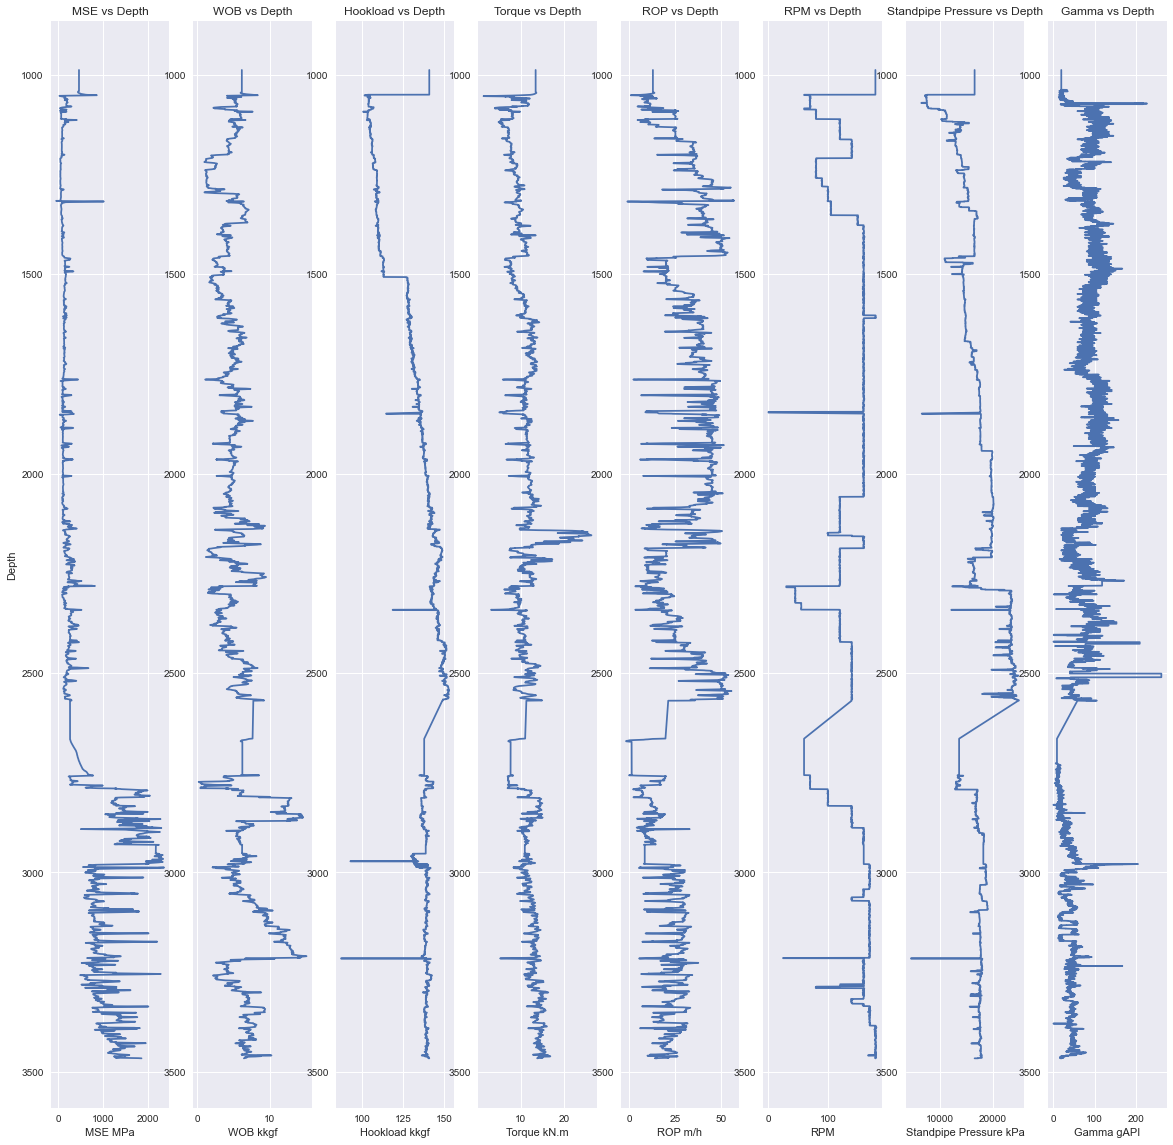

In [25]:
plot_parameters(F_14_MSE)

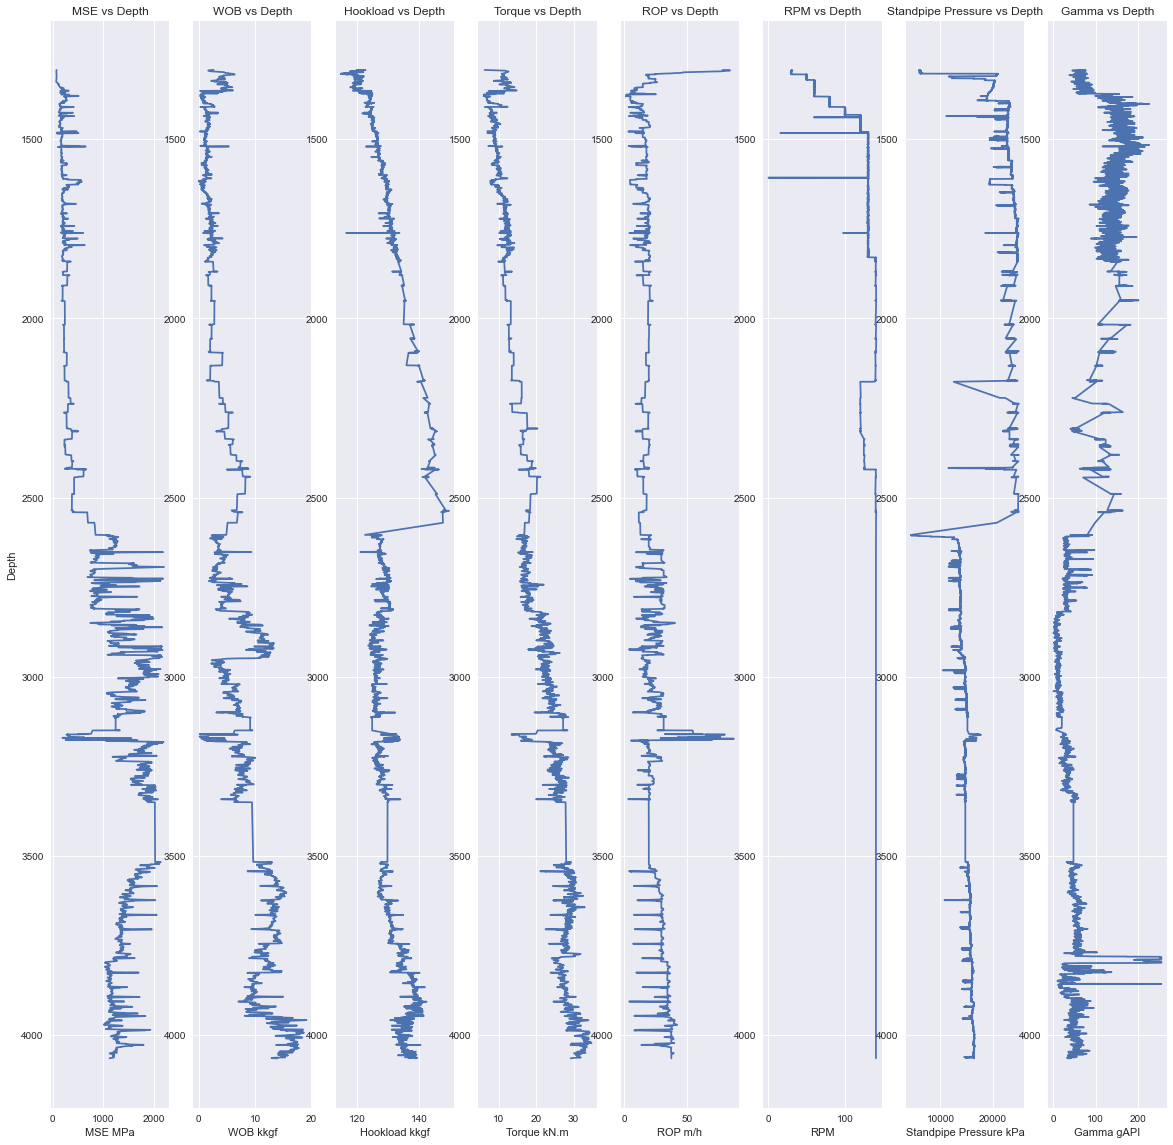

In [26]:
plot_parameters(F_15_MSE)

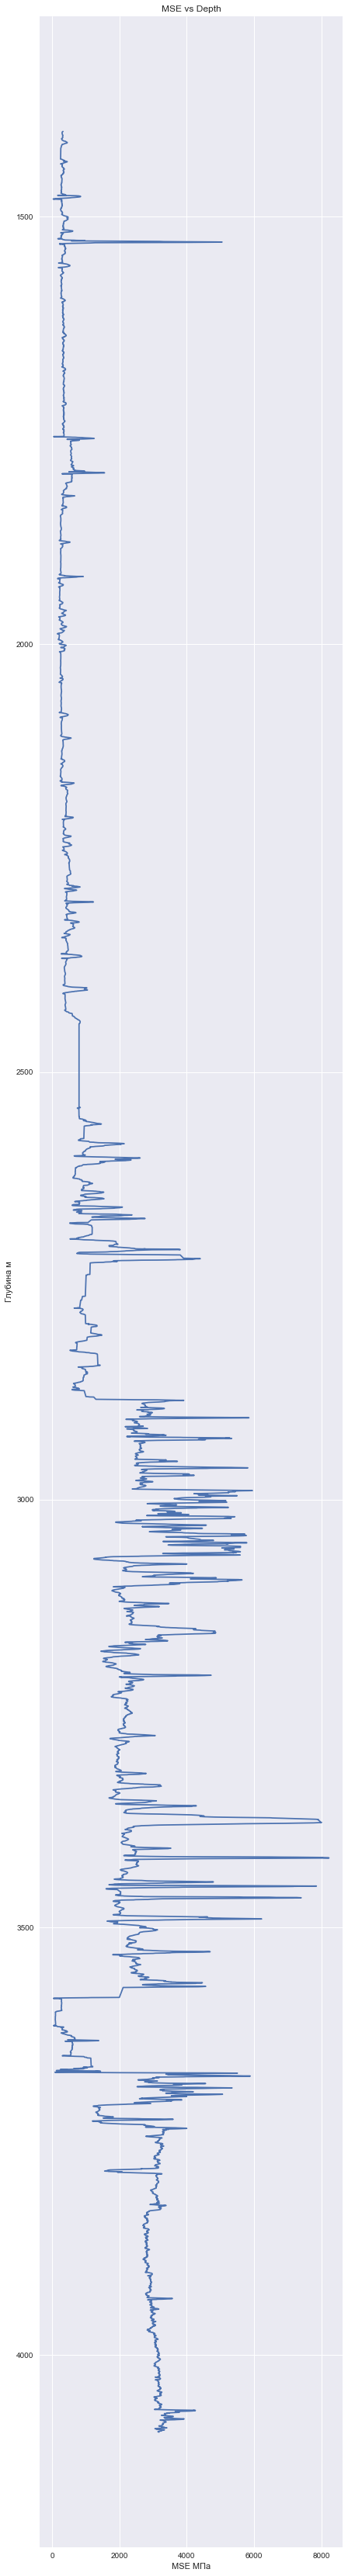

In [27]:
plot_mse(F_15S_MSE) 

No handles with labels found to put in legend.


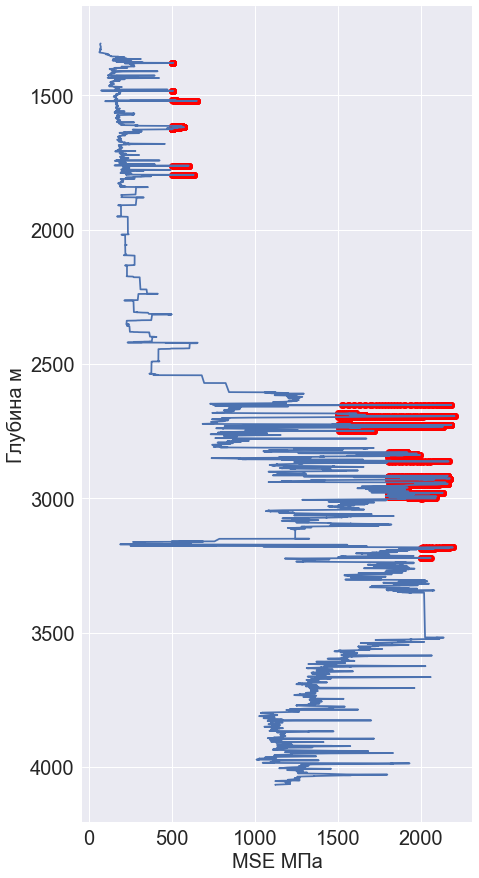

In [28]:
plot_complication(F_15_MSE)

In [29]:
#exporting to csv
F_9A_MSE.to_csv(path_or_buf='data/data_9A.csv',index = False)
F_9_MSE.to_csv(path_or_buf='data/data_9.csv',index = False)
F_5_MSE.to_csv(path_or_buf='data/data_5.csv',index = False)
F_7_MSE.to_csv(path_or_buf='data/data_7.csv',index = False)
F_14_MSE.to_csv(path_or_buf='data/data_14.csv',index = False)
F_15_MSE.to_csv(path_or_buf='data/data_15.csv',index = False)
F_15S_MSE.to_csv(path_or_buf='data/data_15S.csv',index = False)